In [1153]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [1154]:
class CDM:
    def __init__(self, h):
        self.h = h
    
    def diff(self, f, x):
        numerator = f(x + self.h) - f(x - self.h)
        denominator = 2 * self.h

        return numerator / denominator

In [1155]:
class Newton:
    def __init__(self, f, CDM_object, tol=1e-6, max_iter=1000):
        self.f = f
        self.CDM = CDM_object
        self.tol = tol 
        self.max_iter = max_iter

    def solve(self, y, x0):
        x = x0
        for _ in range(self.max_iter):
            f_x = self.f(x) - y
            f_prime_x = self.CDM.diff(self.f, x)
            if abs(f_prime_x) < 1e-10:
                raise ValueError("Derivative is zero, method fails.")
            x_new = x - f_x / f_prime_x
            if abs(x_new - x) < self.tol:
                return x_new
            x = x_new

        raise ValueError(f"Method did not converge.({x_new})")

In [1156]:
class LCG:
    def __init__(self, seed, a=561860773102413563, c=0, m=2**60-93):
        self.seed = seed
        self.a = a
        self.c = c
        self.m = m
        self.state = seed

    def next(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state / self.m  # Normalize to [0, 1)
    
    def next_in_range(self, a, b):
        return a + (b - a) * self.next()

In [1157]:
class MonteCarlo:
    def __init__(self, N, PRNG_object):
        self.N = int(N)
        self.PRNG = PRNG_object
    
    def integrate(self, f, a, b):
        mult = (b - a) / self.N
        
        generatedValues = []
        for _ in range(self.N):
            randomArg = self.PRNG.next_in_range(a, b)
            randomFuncVal = f(randomArg)

            generatedValues.append(randomFuncVal)
        
        return mult * sum(generatedValues)

In [1158]:
import scipy.special
import numpy as np

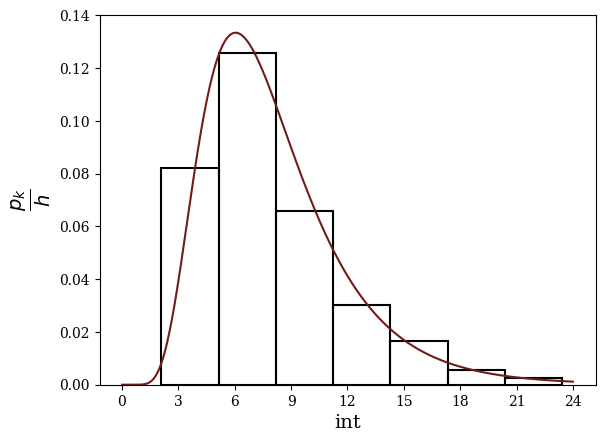

14.648343427314842


In [ ]:
if __name__ == '__main__':

    # ----------------------------------PART1----------------------------------

    def cdf(x): # F_X
        return float(1/2 + 1/2 * \
            scipy.special.erf((np.log(x) - 2)/(np.sqrt(0.4))))

    cdm    = CDM(h=1e-6)
    newton = Newton(cdf, cdm, tol=1e-6, max_iter=1000)

    def inverse(y, x0): # x = f^-1(y)
        return newton.solve(y, x0)

    n = 120

    # x0 = np.random.randint(1, 2**31 - 1)
    # print(f'x0: {x0}')

    lcg = LCG(seed=340751464)

    # ----------------------------------PART2----------------------------------

    data = [lcg.next() for _ in range(n)]
    # data = np.random.rand(n)
    # print(f'Y: {data}')

    guesses = [0, 3, 6, 9, 12, 15, 18, 21]
    for ind, el in enumerate(data):
        for attempt, guess in enumerate(guesses):
            try: 
                inv_value = inverse(el, guess)
                data[ind] = inv_value
                break
            except:
                pass

            if attempt == len(guesses) - 1:
                raise Exception('Solution was not found')
    
    # print(f'X: {data}')

    # -------------------------------------------------------------------------

    # data = [
    #     1.913, 2.875, 3.302, 2.338, 3.967, 0.702, 0.655, 2.038, 0.342, 0.331,
    #     8.936, 7.5, 0.86, 1.763, 3.927, 2.003, 3.036, 6.432, 3.267, 2.78,
    #     0.679, 2.7, 0.927, 3.094, 2.928, 2.274, 4.5, 3.229, 5.441, 2.86, 
    #     8.084, 4.336, 3.673, 1.261, 1.217, 0.383, 6.351, 0.561, 0.276, 3.415,
    #     2.626, 1.753, 2.088, 0.552, 4.465, 5.842, 6.888, 1.189, 0.454, 5.123,
    #     3.136, 0.25, 3.536, 0.369, 0.859, 8.418, 3.623, 2.261, 2.289, 2.373, 
    #     3.884, 3.107, 0.02, 0.354, 6.632, 4.586, 1.594, 2.683, 10.39, 0.648,
    #     0.471, 10.102, 0.094, 0.192, 0.471, 6.658, 4.263, 0.049, 4.102, 0.818,
    #     0.617, 1.39, 1.527, 5.405, 2.492, 5.335, 0.521, 1.716, 0.489, 0.228,
    #     2.839, 2.647, 1.243, 5.501, 1.115, 7.52, 4.539, 1.494, 0.865, 0.869
    # ]
    # n = len(data)

    # -------------------------------------------------------------------------

    # ----------------------------------PART3----------------------------------

    mini, maxi = min(data), max(data)
    # print(f'min: {mini}, max: {maxi}')

    range_ = maxi - mini
    # print(f'range: {range_}')

    # ----------------------------------PART4----------------------------------

    trunc = lambda x : int(str(x)[:str(x).index('.')])

    k = 1 + trunc(np.log2(n))
    # print(f'k: {k}')
    
    h = range_ / k
    # print(f'h: {h}')

    # ----------------------------------PART5----------------------------------

    grouped_data = []

    begin = mini
    for i in range(k):
        end = begin + h

        middle = (begin + end) / 2
        freq = sum(begin <= el < end for el in data)
        
        if i == k - 1:
            freq += 1

        relative_freq = freq / n

        grouped_element = {
            'interval numero': i,
            'interval': f'[{np.round(begin, 4)}, {np.round(end, 4)})',
            'middle': np.round(middle, 4),
            'frequency': freq,
            'relative frequency': relative_freq
        }
        grouped_data.append(grouped_element)

        begin = end

    # for element in grouped_data:
    #     print(element['interval numero'], 
    #           element['interval'], 
    #           element['middle'], 
    #           element['frequency'], 
    #           element['relative frequency'])

    # ----------------------------------PART6----------------------------------

    import matplotlib.pyplot as plt

    def pdf(x):
        return 1 / (np.sqrt(0.4 * np.pi) * x) \
            * np.exp(-(np.log(x) - 2)**2 / 0.4)

    def buildBar(x, y):
        # Define colors
        RED   = '#6F1D1B'

        # Define font sizes
        SIZE_TICKS   = 10

        # histogtamm
        plt.bar(x, y, width=3.05, color='none', edgecolor='black', linewidth=1.5)

        # pdf
        x_values = np.linspace(0.01, trunc(maxi) + 1, 1000)
        y_values = pdf(x_values)
        plt.plot(x_values, y_values, color=RED, linestyle='-', linewidth=1.5)

        # axis names
        plt.xlabel('int')
        plt.ylabel('$\\frac{p_k}{h}$', fontsize=20)

        # ticks settings
        xticks = [i for i in range(0, trunc(maxi) + 2, 3)]
        plt.xticks(xticks)

        # Adjust the font size of the tick labels
        plt.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

        plt.rcParams.update({'font.family': 'serif', 'font.size': 12})
        plt.savefig('histXpdf.png', dpi=300, transparent=True)

        plt.show()

    x_axis = [el['middle']                 for el in grouped_data]
    y_axis = [el['relative frequency'] / h for el in grouped_data]

    # print(f'x: {np.round(x_axis, 4)}')
    # print(f'y: {np.round(y_axis, 4)}')

    # buildBar(x_axis, y_axis)

    # ----------------------------------PART7----------------------------------

    monteCarlo = MonteCarlo(1e7, lcg)

    def subs(t):
        return np.tan(t) * pdf(np.tan(t)) * (1 / np.cos(t)**2) 

    # ExpectedValue = monteCarlo.integrate(subs, 0, np.pi/2)
    
    # print(ExpectedValue)

    # ----------------------------------PART8----------------------------------

    def subs2(t):
        return np.tan(t)**2 * pdf(np.tan(t)) * (1 / np.cos(t)**2) 

    # Var = monteCarlo.integrate(subs2, 0, np.pi/2) - \
    #       monteCarlo.integrate(subs, 0, np.pi/2)**2
    
    # print(Var)

    # ----------------------------------PART9----------------------------------

    OverlineX = sum(data)/n

    print(f'OverlineX: {OverlineX}')

    S2 = 1 / (n - 1) * sum([(x - OverlineX)**2 for x in data])

    print(f'S2: {S2}')


<center> <h> TESTING </h> </center>

In [1160]:
1e6

1000000.0

In [1161]:
from scipy.stats import lognorm

mu = 2
sigma = np.sqrt(0.2)

lognorm_dist = lognorm(s=sigma, scale=np.exp(mu))

def foo(x):
    # return math.sin(x)
    # return x**3 - 2 * x - 5
    return lognorm_dist.cdf(x)

def inv_foo(y):
    return lognorm_dist.ppf(y)


In [1162]:
if __name__ == '__main__':
    def cdf(x): # F_X
        return 1/2 + 1/2 * scipy.special.erf((np.log(x) - 2)/(np.sqrt(0.4)))

    for i in range(0, 15):
        print(f'{foo(i)}   {cdf(i)}')

    cdm    = CDM(h=1e-6)
    newton = Newton(cdf, cdm, tol=1e-6, max_iter=1000)

    def inverse(y, x0): # x = f^-1(y)
        return newton.solve(y, x0)

    print(f'')

    data    = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    guesses = [0, 3, 6, 9, 12, 15]

    for el in data:
        print(f'scipy: {inv_foo(el)}')
        for guess in guesses:
            try: 
                print(f'mine: {newton.solve(el, guess)}')
                break
            except:
                print(f'guess {guess} did not converge') 
        print('-'*200)

0.0   0.0
3.872108215522035e-06   3.8721082155079856e-06
0.0017377758616781594   0.0017377758616781702
0.02192278341298803   0.02192278341298809
0.08498697353639512   0.08498697353639517
0.1912434209910377   0.1912434209910377
0.32073660943851223   0.32073660943851223
0.4518658802235498   0.45186588022354973
0.5704958448352845   0.5704958448352841
0.6703962386690854   0.6703962386690855
0.7506703760137534   0.7506703760137536
0.8131921096796417   0.8131921096796417
0.8608806027417297   0.8608806027417297
0.8967530500020445   0.8967530500020444
0.9234943810897667   0.9234943810897667

scipy: 4.165651627465189
guess 0 did not converge
mine: 4.165651627465252
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
scipy: 5.071393044464941
guess 0 did not converge
mine: 5.07139304446494
-------------------------------------------------------------